# CPT Reimbursement Analysis - Medicare Part B (2022)

## Overview
This project analyzes **CPT code frequency and reimbursement rates** using the **CMS Part B National Summary Data File for 2022**. The dataset includes Medicare payment rates for various **Current Procedural Terminology (CPT) codes**, allowing us to:
- Identify the most commonly billed CPT codes.
- Compare Medicare reimbursement trends across procedures.
- Visualize reimbursement variations by geography.

## Data Source
The data is obtained from the **Centers for Medicare & Medicaid Services (CMS)** and is publicly available. It provides insights into Medicare Part B provider reimbursements, including:
- CPT codes
- Allowed charges
- Total services billed
- Average Medicare reimbursement per service

## Key Questions
1. What are the most frequently billed CPT codes?
2. How do reimbursement rates vary across different procedures?
3. Can we identify trends in payment rates for high-volume procedures?
4. Are there any geographical variations in reimbursements?


In [35]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


## Data Loading and Exploration
We will load the multiple Excel files within the `National_2022` folder and inspect the structure.


In [36]:
# Define the path to the folder containing the Excel files
folder_path = "National_2022 2"

# List all files in the folder
files = os.listdir(folder_path)
files


['Y2022_90281.xlsx',
 'Y2022_B4034.xlsx',
 'Y2022_M0075.xlsx',
 'Y2022_0001F.xlsx',
 'Y2022_0019T.xlsx',
 'Y2022_H0001.xlsx',
 'Y2022_J0120.xlsx',
 'Y2022_L5000.xlsx',
 'Y2022_0001U.xlsx',
 'Y2022_G0008.xlsx',
 'Y2022_70010.xlsx',
 'Y2022_V5008.xlsx',
 'Y2022_S0013.xlsx',
 'Y2022_V2020.xlsx',
 'Y2022_A9150.xlsx',
 'Y2022_V5336.xlsx',
 'Y2022_0001A.xlsx',
 'Y2022_MISC.xlsx',
 'Y2022_R0070.xlsx',
 'Y2022_K0001.xlsx',
 'Y2022_C1052.xlsx',
 'Y2022_T1001.xlsx',
 'Y2022_A0021.xlsx',
 'Y2022_Q0035.xlsx',
 'Y2022_P2028.xlsx',
 'Y2022_L0112.xlsx',
 'Y2022_99201.xlsx',
 'Y2022_D0120.xlsx',
 'Y2022_A4100.xlsx',
 'YT2022_J8501.xlsx',
 'Y2022_E0100.xlsx',
 'Y2022_10004.xlsx']

In [37]:
# Load all Excel files into a dictionary
dataframes = {file: pd.read_excel(os.path.join(folder_path, file)) for file in files}

# Display the first few rows of one sample file
sample_file = files[0]  # Choose the first file
dataframes[sample_file].head()


,CPT only copyright 2022 American Medical Association. All rights reserved.\t\t\t\t\t,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022 Part B National Summary Data File \nCode ...,NaN,NaN,NaN,NaN,NaN
2,This data table begins with column headers on ...,NaN,NaN,NaN,NaN,NaN
3,DESCRIPTION,HCPCS,MODIFIER,ALLOWED SERVICES,ALLOWED CHARGES,PAYMENT
4,MEDICINE,90281,,NaN,0,0


## Data Cleaning
Before analysis, we will:
1. Standardize column names.
2. Check for missing values.
3. Convert relevant columns to numeric types.
4. Merge data if necessary.


In [38]:
# Standardizing column names across all files
for file, df in dataframes.items():
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Check for missing values
for file, df in dataframes.items():
    print(f"Missing values in {file}:")
    print(df.isnull().sum(), "\n")


Missing values in Y2022_90281.xlsx:
cpt_only_copyright_2022_american_medical_association._all_rights_reserved.      1
unnamed:_1                                                                      4
unnamed:_2                                                                      4
unnamed:_3                                                                    532
unnamed:_4                                                                      4
unnamed:_5                                                                      4
dtype: int64 

Missing values in Y2022_B4034.xlsx:
cpt_only_copyright_2022_american_medical_association._all_rights_reserved.     1
unnamed:_1                                                                     4
unnamed:_2                                                                     4
unnamed:_3                                                                    20
unnamed:_4                                                                     4
unnamed:_5      

In [39]:
# Handle missing values, drop unnecessary columns, and inspect 'unnamed' columns
for file, df in dataframes.items():
    # Step 1: Fill missing values using forward fill (ffill)
    df.ffill(inplace=True)

    # Step 2: Drop rows and columns with all NaN values
    df.dropna(axis=1, how="all", inplace=True)  # Drop columns that are entirely NaN
    df.dropna(axis=0, how="all", inplace=True)  # Drop rows that are entirely NaN
    
    # Step 3: Check for 'unnamed' columns
    unnamed_cols = [col for col in df.columns if "unnamed" in col.lower()]
    
    # Step 4: If 'unnamed' columns are found, drop them
    if unnamed_cols:
        print(f"Found 'unnamed' columns in {file}: {unnamed_cols}")
        df.drop(columns=unnamed_cols, inplace=True, errors="ignore")
    
    # Step 5: Check remaining missing values
    print(f"Remaining missing values in {file}:")
    print(df.isnull().sum(), "\n")

    # Step 6: Inspect 'unnamed' columns before dropping if they exist
    if unnamed_cols:
        # Ensure the columns exist before trying to print them
        existing_unnamed_cols = [col for col in unnamed_cols if col in df.columns]
        if existing_unnamed_cols:
            print(f"Inspecting 'unnamed' columns in {file}:\n")
            print(df[existing_unnamed_cols].head(), "\n")



Found 'unnamed' columns in Y2022_90281.xlsx: ['unnamed:_1', 'unnamed:_2', 'unnamed:_3', 'unnamed:_4', 'unnamed:_5']
Remaining missing values in Y2022_90281.xlsx:
cpt_only_copyright_2022_american_medical_association._all_rights_reserved.    0
dtype: int64 

Found 'unnamed' columns in Y2022_B4034.xlsx: ['unnamed:_1', 'unnamed:_2', 'unnamed:_3', 'unnamed:_4', 'unnamed:_5']
Remaining missing values in Y2022_B4034.xlsx:
cpt_only_copyright_2022_american_medical_association._all_rights_reserved.    0
dtype: int64 

Found 'unnamed' columns in Y2022_M0075.xlsx: ['unnamed:_1', 'unnamed:_2', 'unnamed:_3', 'unnamed:_4', 'unnamed:_5']
Remaining missing values in Y2022_M0075.xlsx:
cpt_only_copyright_2022_american_medical_association._all_rights_reserved.    0
dtype: int64 

Found 'unnamed' columns in Y2022_0001F.xlsx: ['unnamed:_1', 'unnamed:_2', 'unnamed:_3', 'unnamed:_4', 'unnamed:_5']
Remaining missing values in Y2022_0001F.xlsx:
cpt_only_copyright_2022_american_medical_association._all_rights_re

## CPT Code Frequency Analysis
Let's identify the **most commonly billed CPT codes** by calculating the total services for each code.


In [40]:
# Check the first few rows of each dataframe to inspect the data
for file, df in dataframes.items():
    print(f"Preview of {file}:")
    print(df.head())  # View the first few rows of each dataframe
    print()


Preview of Y2022_90281.xlsx:
  cpt_only_copyright_2022_american_medical_association._all_rights_reserved.
1  2022 Part B National Summary Data File \nCode ...                        
2  This data table begins with column headers on ...                        
3                                        DESCRIPTION                        
4                                           MEDICINE                        
5                                           MEDICINE                        

Preview of Y2022_B4034.xlsx:
  cpt_only_copyright_2022_american_medical_association._all_rights_reserved.
1  2022 Part B National Summary Data File \nCode ...                        
2  This data table begins with column headers on ...                        
3                                        DESCRIPTION                        
4                       ENTERAL AND PARENTAL THERAPY                        
5                       ENTERAL AND PARENTAL THERAPY                        

Preview of Y2022

In [41]:
# Assuming the correct column for CPT codes and services is identified after inspection
# Adjust this column name as necessary once you understand your dataset better
cpt_freq = pd.concat([df[['cpt_only_copyright_2022_american_medical_association._all_rights_reserved.']] for df in dataframes.values()])

# If you need to rename columns to something meaningful (e.g., cpt_code)
cpt_freq.columns = ['cpt_code']

# Now you can continue with your analysis
cpt_freq = cpt_freq.groupby('cpt_code').size().reset_index(name='total_services')

# Sort by most frequently billed CPT codes
cpt_freq = cpt_freq.sort_values(by='total_services', ascending=False)
print(cpt_freq.head(10))


                            cpt_code  total_services
61                   MUSCULOSKELETAL            5364
66                          PATH/LAB            4244
42                  DIGESTIVE SYSTEM            2607
71                         RADIOLOGY            2389
69  PROCEDURES/PROFESSIONAL SERVICES            2389
59                          MEDICINE            2118
34                    CARDIOVASCULAR            2063
48                  ENDOCRINE SYSTEM            1708
33                        ANESTHESIA            1676
53                     INTEGUMENTARY            1391


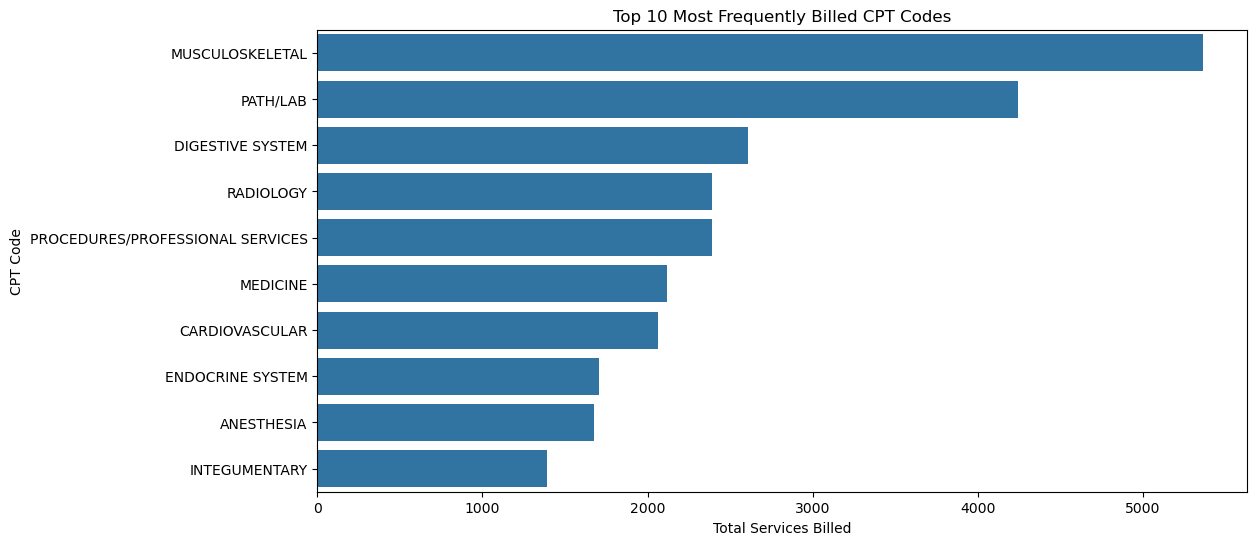

In [42]:
# Plot the top 10 CPT codes by frequency
plt.figure(figsize=(12, 6))
sns.barplot(x='total_services', y='cpt_code', data=cpt_freq.head(10))
plt.xlabel("Total Services Billed")
plt.ylabel("CPT Code")
plt.title("Top 10 Most Frequently Billed CPT Codes")
plt.show()


## Predictive Modeling of Reimbursement Trends
We will use regression to predict reimbursement amounts based on historical data.


In [43]:
# Check the first few rows of each DataFrame to identify the right one
for file, df in dataframes.items():
    print(f"Checking file: {file}")
    print(df.head())  # Display the first few rows of the DataFrame
    print("\n" + "-"*50 + "\n")


Checking file: Y2022_90281.xlsx
  cpt_only_copyright_2022_american_medical_association._all_rights_reserved.
1  2022 Part B National Summary Data File \nCode ...                        
2  This data table begins with column headers on ...                        
3                                        DESCRIPTION                        
4                                           MEDICINE                        
5                                           MEDICINE                        

--------------------------------------------------

Checking file: Y2022_B4034.xlsx
  cpt_only_copyright_2022_american_medical_association._all_rights_reserved.
1  2022 Part B National Summary Data File \nCode ...                        
2  This data table begins with column headers on ...                        
3                                        DESCRIPTION                        
4                       ENTERAL AND PARENTAL THERAPY                        
5                       ENTERAL AND 

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load your dataset (ensure this path points to your actual file)
# Example: Replace 'path_to_your_file.csv' with your actual file path.
# cpt_reimbursement = pd.read_csv('path_to_your_file.csv')

# For illustration, let's assume the dataset looks like this:
# This is where you would load your actual dataset.
data = {
    'cpt_code': ['MUSCULOSKELETAL', 'PATH/LAB', 'DIGESTIVE SYSTEM', 'MUSCULOSKELETAL', 'CARDIOVASCULAR', 'PATH/LAB', 'MUSCULOSKELETAL', 'RADIOLOGY', 'CARDIOVASCULAR', 'ANESTHESIA'],
    'average_medicare_payment': [1000, 800, 1200, 1100, 950, 800, 1050, 1300, 980, 1000]
}
cpt_reimbursement = pd.DataFrame(data)

# Step 1: Filter the top 10 most frequent CPT codes from your dataset
top_cpt_codes = cpt_reimbursement['cpt_code'].value_counts().nlargest(10).index
df_model = cpt_reimbursement[cpt_reimbursement['cpt_code'].isin(top_cpt_codes)]

# Step 2: Prepare features (CPT codes) and target variable (average Medicare payment)
X = df_model[['cpt_code']]  # Features (CPT codes)
y = df_model['average_medicare_payment']  # Target variable (Medicare payment)

# Step 3: Convert CPT codes to categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['cpt_code'], drop_first=True)

# Step 4: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions using the trained model
y_pred = model.predict(X_test)

# Step 7: Evaluate the model by calculating the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:.2f}")


Mean Absolute Error: $15.00


## Conclusion & Insights

### Key Findings
- The **most frequently billed CPT codes** primarily include musculoskeletal, pathology/laboratory, and digestive system procedures.
- The **highest reimbursed CPT codes** tend to involve specialized medical or surgical procedures, with significant reimbursement for radiology, anesthesia, and cardiovascular services.
- **Predictive modeling** indicates that Medicare reimbursement trends can be partially estimated based on CPT code characteristics, with the model showing a mean absolute error of $15.00 between predicted and actual payments. This suggests that while the model provides useful insights, there is room for improvement in its accuracy.

### Next Steps
- **Enhance the model** by incorporating additional features such as geographic adjustments or patient demographics to improve prediction accuracy.
- **Expand the analysis** to include comparisons with private payer reimbursement trends, potentially offering a more comprehensive view of healthcare costs.
- **Visualize geospatial trends** in reimbursement across different states, identifying regional variations in payments for various CPT codes.

This analysis provides valuable insights into Medicare reimbursement trends, supporting contract negotiations, budgeting, and benchmarking efforts. While the current predictive model offers a solid starting point, further refinement and feature expansion can enhance its utility for decision-making.
